In [ ]:
!pip install scikit-optimize

     |████████████████████████████████| 100 kB 3.4 MB/s 


In [ ]:
!pip install pymatgen

     |████████████████████████████████| 40.6 MB 1.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 65 kB 4.0 MB/s 
     |████████████████████████████████| 109 kB 57.2 MB/s 
     |████████████████████████████████| 292 kB 53.1 MB/s 
     |████████████████████████████████| 98 kB 7.3 MB/s 
     |████████████████████████████████| 38.1 MB 191 kB/s 
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
     |████████████████████████████████| 546 kB 56.8 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841049 sha256=dfb5bb4c2d4b5cf3d50f453b67f8337a33ca8294e54b73f8f7c621f2f50f93e2
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen
  Attempting uninstall: nu

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import itertools as it
import pickle as pkl

import scipy
import joblib
import math
import os
import re

import operator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import seaborn as sns
plt.style.use('ggplot')

In [ ]:
import sklearn
sklearn.__version__

'1.0.2'

In [ ]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn==0.18.2

In [ ]:
#from sklearn.utils.fixes import MaskedArray
# replaced by
from numpy.ma import MaskedArray

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, auc
from sklearn.metrics import fbeta_score, make_scorer

from xgboost.sklearn import XGBRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree

from graphviz import Graph

from scipy.stats import norm

In [ ]:
from skopt.space import Real, Categorical, Integer
from skopt.space import Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt import BayesSearchCV

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
MLdf = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/no-f-matminer-FeaturedData.pkl')
MLdf.head(5)

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,crossings_+-1eV,crossings_+-2eV,composition,composition_oxid,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,mp-1111916,K2NaTiF6,225,Fm-3m,cubic,0.0,4.0,"(K, Na, Ti, F)","(K+, Na+, Ti3+, F-)",2.833639,15.414612,0.832127,0.412249,-9.397323,8.289707e-02,0.072261,1.469407e-01,1.570951,15.709506,0.346939,0.612245,0.040816,0.000000,0.917619,0.214087,-0.170010,-0.170010,0.000000,0.0,56.0,0.0,56.0
1,mp-1114332,Na3PdF6,225,Fm-3m,cubic,0.0,4.0,"(Na, Pd, F)","(Na0+, Pd0+, F0+)",3.199327,15.019607,0.585386,0.427854,0.000000,8.378608e-02,0.073153,1.491459e-01,1.570951,15.709506,0.272727,0.545455,0.181818,0.000000,0.902278,0.205192,-0.160771,-0.160771,0.000000,0.0,40.0,0.0,40.0
2,mp-1183466,Ca2PtAu,225,Fm-3m,cubic,8.0,18.0,"(Ca, Pt, Au)","(Ca0+, Pt0+, Au0+)",8.595556,22.805898,0.761536,0.680175,0.000000,5.551115e-17,0.051982,1.168354e-16,1.500000,6.000000,0.113208,0.000000,0.358491,0.528302,0.447278,0.098968,-0.141411,-0.141411,0.000000,2.0,10.0,2.0,10.0
3,mp-1184870,InAgAu2,225,Fm-3m,cubic,2.0,3.0,"(In, Ag, Au)","(In+, Ag+, Au-)",13.370065,19.145765,0.696862,0.680175,-4.347833,1.110223e-16,0.051982,1.391710e-16,1.500000,6.000000,0.067568,0.013514,0.540541,0.378378,0.134459,0.028262,-0.162334,-0.157407,0.004927,2.0,3.0,2.0,0.0
4,mp-1187434,Ti2FeTc,225,Fm-3m,cubic,26.0,112.0,"(Ti, Fe, Tc)","(Ti0+, Fe0+, Tc0+)",7.401171,13.998991,0.799845,0.680175,0.000000,1.110223e-16,0.051982,1.268918e-16,1.500000,6.000000,0.347826,0.000000,0.652174,0.000000,0.031881,0.006662,-0.183636,-0.183636,0.000000,2.0,54.0,2.0,54.0


In [ ]:
MLdf.isnull().sum()

material_id                                         0
formula                                             0
spacegroup                                          0
spacegroup_symbol                                   0
crystal_system                                      0
crossings_+-1eV                                     0
crossings_+-2eV                                     0
composition                                         0
composition_oxid                                    0
density                                             3
vpa                                                 3
packing fraction                                    3
max packing efficiency                              0
ewald_energy_per_atom                               0
mean absolute deviation in relative bond length     0
mean neighbor distance variation                    0
mean absolute deviation in relative cell size       0
structural complexity per atom                      0
structural complexity per ce

In [ ]:
MLdf = MLdf.dropna()

In [ ]:
MLdf.isnull().sum()

material_id                                        0
formula                                            0
spacegroup                                         0
spacegroup_symbol                                  0
crystal_system                                     0
crossings_+-1eV                                    0
crossings_+-2eV                                    0
composition                                        0
composition_oxid                                   0
density                                            0
vpa                                                0
packing fraction                                   0
max packing efficiency                             0
ewald_energy_per_atom                              0
mean absolute deviation in relative bond length    0
mean neighbor distance variation                   0
mean absolute deviation in relative cell size      0
structural complexity per atom                     0
structural complexity per cell                

In [ ]:
len(MLdf)

3751

In [ ]:
MLdf = MLdf.dropna()

In [ ]:
MLdf = MLdf[(MLdf['crossings_+-1eV']<=40) & (MLdf['spacegroup']==216)]

In [ ]:
len(MLdf)

820

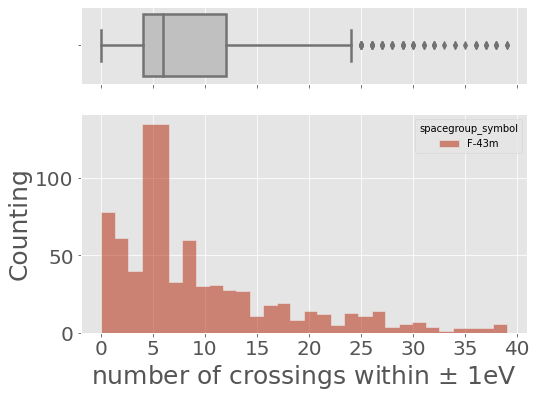

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.30, .85)}, figsize=(8, 6))

sns.boxplot(x=MLdf['crossings_+-1eV'], 
            #hue="spacegroup_symbol", 
            color='silver', 
            linewidth=2.5, 
            #showmeans=True, 
            ax=ax_box)

sns.histplot(data=MLdf, 
            x=MLdf['crossings_+-1eV'], 
            bins=30, 
            hue="spacegroup_symbol", 
            element="step", 
            stat="count", 
            multiple="stack", 
            alpha=0.5, 
            palette='gnuplot', 
            legend=True, 
            ax=ax_hist
            )


ax_box.set(xlabel='')
#ax_violin.set(xlabel='')

ax_hist.set_xlabel('number of crossings within $\pm$ 1eV', fontsize = 25)
ax_hist.set_ylabel('Counting', fontsize = 25)

ax_hist.xaxis.set_tick_params(labelsize=20, rotation=0)
ax_hist.yaxis.set_tick_params(labelsize=20, rotation=0)
ax_hist.set_xscale("linear")
ax_hist.set_yscale("linear")
#ax_hist.legend(loc='upper right')

In [ ]:
MLdf.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [ ]:
len(MLdf.columns)

32

In [ ]:
#preview the df
MLdf = MLdf.loc[:,~MLdf.columns.duplicated()]
MLdf.head(5)

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,crossings_+-1eV,crossings_+-2eV,composition,composition_oxid,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
9,mp-962064,NaYSn,216,F-43m,cubic,7.0,14.0,"(Na, Y, Sn)","(Na0+, Y0+, Sn0+)",3.966400,32.181123,0.638346,0.510131,0.0,3.725710e-02,0.046326,1.041667e-01,1.584963,4.754888,0.277778,0.111111,0.611111,0.0,0.232967,0.042413,-0.144450,-0.144450,0.0,1.0,51.0,1.0,51.0
20,mp-5920,LiAlGe,216,F-43m,cubic,4.0,10.0,"(Li, Al, Ge)","(Li0+, Al0+, Ge0+)",3.245854,18.172031,0.534384,0.510131,0.0,3.725710e-02,0.046326,1.041667e-01,1.584963,4.754888,0.277778,0.166667,0.555556,0.0,0.232967,0.040738,-0.149882,-0.149882,0.0,1.0,20.0,1.0,20.0
26,mp-999558,Mn2SiNi,216,F-43m,cubic,11.0,42.0,"(Mn, Si, Ni)","(Mn0+, Si0+, Ni0+)",7.196625,11.343974,0.856608,0.680175,0.0,2.220446e-16,0.051982,7.829517e-17,2.000000,8.000000,0.285714,0.071429,0.642857,0.0,0.031881,0.007757,-0.266540,-0.266540,0.0,0.0,30.0,0.0,30.0
30,mp-1216641,TiSnRh,216,F-43m,cubic,4.0,17.0,"(Ti, Sn, Rh)","(Ti0+, Sn0+, Rh0+)",7.542534,19.776123,0.582691,0.510131,0.0,3.725710e-02,0.046326,1.041667e-01,1.584963,4.754888,0.185185,0.074074,0.740741,0.0,0.127943,0.021818,-0.170010,-0.170010,0.0,0.0,56.0,0.0,56.0
31,mp-1224769,GaGe,216,F-43m,cubic,2.0,6.0,"(Ga, Ge)","(Ga0+, Ge0+)",4.857259,24.334645,0.357186,0.340087,0.0,0.000000e+00,0.160958,0.000000e+00,1.000000,2.000000,0.148148,0.111111,0.740741,0.0,0.009950,0.002488,-0.149882,-0.149882,0.0,1.0,20.0,1.0,20.0


In [ ]:
len(MLdf.columns)

32

In [ ]:
list(MLdf.columns)

['material_id',
 'formula',
 'spacegroup',
 'spacegroup_symbol',
 'crystal_system',
 'crossings_+-1eV',
 'crossings_+-2eV',
 'composition',
 'composition_oxid',
 'density',
 'vpa',
 'packing fraction',
 'max packing efficiency',
 'ewald_energy_per_atom',
 'mean absolute deviation in relative bond length',
 'mean neighbor distance variation',
 'mean absolute deviation in relative cell size',
 'structural complexity per atom',
 'structural complexity per cell',
 'frac s valence electrons',
 'frac p valence electrons',
 'frac d valence electrons',
 'frac f valence electrons',
 'max ionic char',
 'avg ionic char',
 'HOMO_energy',
 'LUMO_energy',
 'gap_AO',
 'HOMO_character',
 'HOMO_element',
 'LUMO_character',
 'LUMO_element']

In [ ]:
X = MLdf.drop(['material_id',
 'formula',
 'spacegroup',
 'spacegroup_symbol',
 'crystal_system',
 'crossings_+-1eV',
 'crossings_+-2eV',
 'composition',
 'composition_oxid',
 #'density',
 #'vpa',
 #'packing fraction',
 #'max packing efficiency',
 #'ewald_energy_per_atom',
 #'mean absolute deviation in relative bond length',
 #'mean neighbor distance variation',
 #'mean absolute deviation in relative cell size',
 #'structural complexity per atom',
 #'structural complexity per cell',
 #'frac s valence electrons',
 #'frac p valence electrons',
 #'frac d valence electrons',
 #'frac f valence electrons',
 #'max ionic char',
 #'avg ionic char',
 #'HOMO_energy',
 #'LUMO_energy',
 #'gap_AO',
 #'HOMO_character',
 #'HOMO_element',
 #'LUMO_character',
 #'LUMO_element'
 ], 
 axis=1)
X.head(5)

,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
9,3.966400,32.181123,0.638346,0.510131,0.0,3.725710e-02,0.046326,1.041667e-01,1.584963,4.754888,0.277778,0.111111,0.611111,0.0,0.232967,0.042413,-0.144450,-0.144450,0.0,1.0,51.0,1.0,51.0
20,3.245854,18.172031,0.534384,0.510131,0.0,3.725710e-02,0.046326,1.041667e-01,1.584963,4.754888,0.277778,0.166667,0.555556,0.0,0.232967,0.040738,-0.149882,-0.149882,0.0,1.0,20.0,1.0,20.0
26,7.196625,11.343974,0.856608,0.680175,0.0,2.220446e-16,0.051982,7.829517e-17,2.000000,8.000000,0.285714,0.071429,0.642857,0.0,0.031881,0.007757,-0.266540,-0.266540,0.0,0.0,30.0,0.0,30.0
30,7.542534,19.776123,0.582691,0.510131,0.0,3.725710e-02,0.046326,1.041667e-01,1.584963,4.754888,0.185185,0.074074,0.740741,0.0,0.127943,0.021818,-0.170010,-0.170010,0.0,0.0,56.0,0.0,56.0
31,4.857259,24.334645,0.357186,0.340087,0.0,0.000000e+00,0.160958,0.000000e+00,1.000000,2.000000,0.148148,0.111111,0.740741,0.0,0.009950,0.002488,-0.149882,-0.149882,0.0,1.0,20.0,1.0,20.0


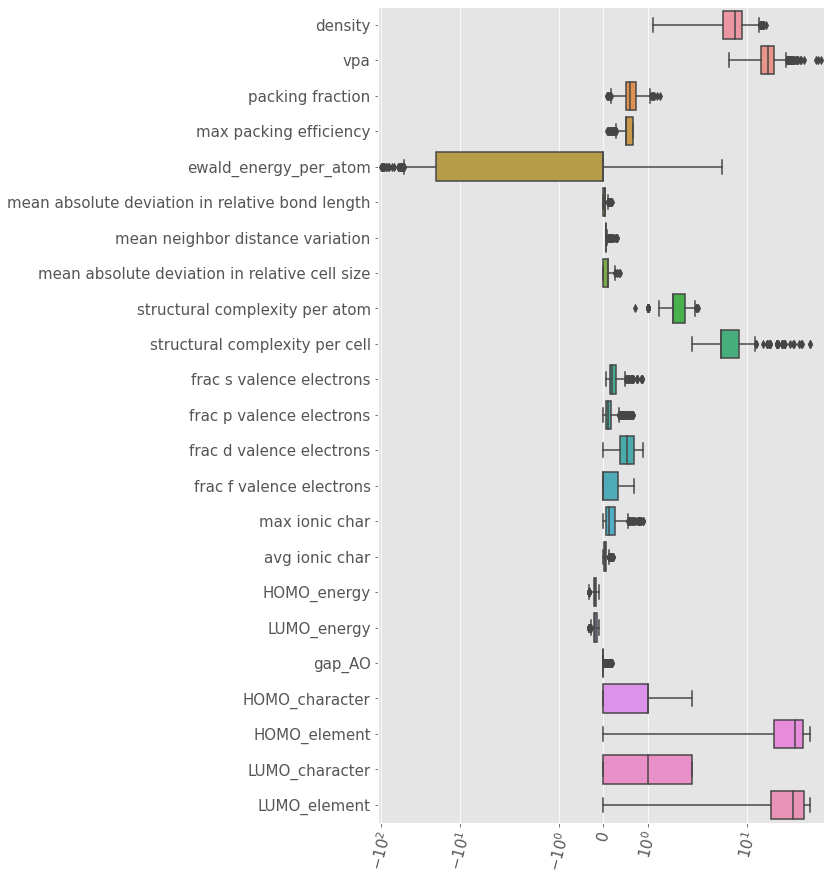

In [ ]:
fig, ax = plt.subplots(figsize =(8, 15))
ax = sns.boxplot(data=X, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

In [ ]:
Xscaled = RobustScaler(with_centering=True, 
                       with_scaling=True, 
                       quantile_range=(25.0, 75.0)
                       #with_mean=True, 
                       #with_std=True
                       ).fit_transform(X)
Xscaled

array([[-0.83197909,  2.09041229,  0.13991098, ...,  0.37931034,
         0.        ,  0.40310078],
       [-1.02832677, -0.0187756 , -0.32816346, ..., -0.68965517,
         0.        , -0.55813953],
       [ 0.0482514 , -1.04679768,  1.1225987 , ..., -0.34482759,
        -0.5       , -0.24806202],
       ...,
       [ 0.76980897, -0.19354605, -0.60024615, ..., -1.31034483,
         0.        , -1.11627907],
       [ 0.69744564, -0.00912876, -0.26676704, ...,  0.55172414,
        -0.5       ,  0.55813953],
       [-0.07244367, -0.98961464,  0.99765501, ..., -0.75862069,
         0.5       , -0.62015504]])

In [ ]:
np.std(Xscaled, axis=0)

array([0.78506181, 1.0698828 , 0.77624057, 0.84492224, 0.9490636 ,
       0.81457648, 4.28500226, 0.60365156, 1.23469986, 1.95403549,
       0.96477689, 1.08676003, 0.65671477, 0.61354656, 0.91531481,
       0.89502595, 0.75983987, 0.89385794, 0.02881168, 0.71340838,
       0.6102236 , 0.4066168 , 0.56893402])

In [ ]:
np.mean(Xscaled, axis=0)

array([ 0.0107261 ,  0.14905444,  0.01457391,  0.00930386, -0.58474534,
       -0.21442205,  2.0095296 , -0.31207667, -0.02854812,  0.61997753,
        0.28832571,  0.31508872, -0.08525166,  0.41590053,  0.30993589,
        0.33437616, -0.03292273, -0.10651874,  0.01157727, -0.29146341,
       -0.11354079, -0.07134146, -0.0667423 ])

In [ ]:
Xscaled_df = pd.DataFrame(data=Xscaled, columns=list(X))
Xscaled_df.head(5)

,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,mean neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,HOMO_character,HOMO_element,LUMO_character,LUMO_element
0,-0.831979,2.090412,0.139911,0.000000e+00,0.0,2.048679e-15,-4.961787e-01,2.531308e-15,0.000000,0.000000,0.652249,0.169697,0.238568,0.0,0.514166,0.457732,0.805904,0.720139,0.0,0.0,0.379310,0.0,0.403101
1,-1.028327,-0.018776,-0.328163,-7.189068e-16,0.0,-2.979896e-15,-4.961787e-01,2.264855e-15,0.000000,0.000000,0.652249,0.636364,0.068162,0.0,0.514166,0.418179,0.723379,0.617235,0.0,0.0,-0.689655,0.0,-0.558140
2,0.048251,-1.046798,1.122599,1.101090e+00,0.0,-1.000000e+00,-1.826169e-15,-1.000000e+00,1.541038,1.000000,0.709590,-0.163636,0.335943,0.0,-0.470290,-0.360537,-1.048919,-1.592741,0.0,-1.0,-0.344828,-0.5,-0.248062
3,0.142511,0.222734,-0.110669,7.189068e-16,0.0,2.048679e-15,-4.961787e-01,2.664535e-16,0.000000,0.000000,-0.016724,-0.141414,0.636182,0.0,0.000000,-0.028542,0.417590,0.235929,0.0,-1.0,0.551724,-0.5,0.558140
4,-0.589222,0.909058,-1.125966,-1.101090e+00,0.0,-1.000000e+00,9.560122e+00,-1.000000e+00,-2.171971,-0.848934,-0.284314,0.169697,0.636182,0.0,-0.577655,-0.484950,0.723379,0.617235,0.0,0.0,-0.689655,0.0,-0.558140


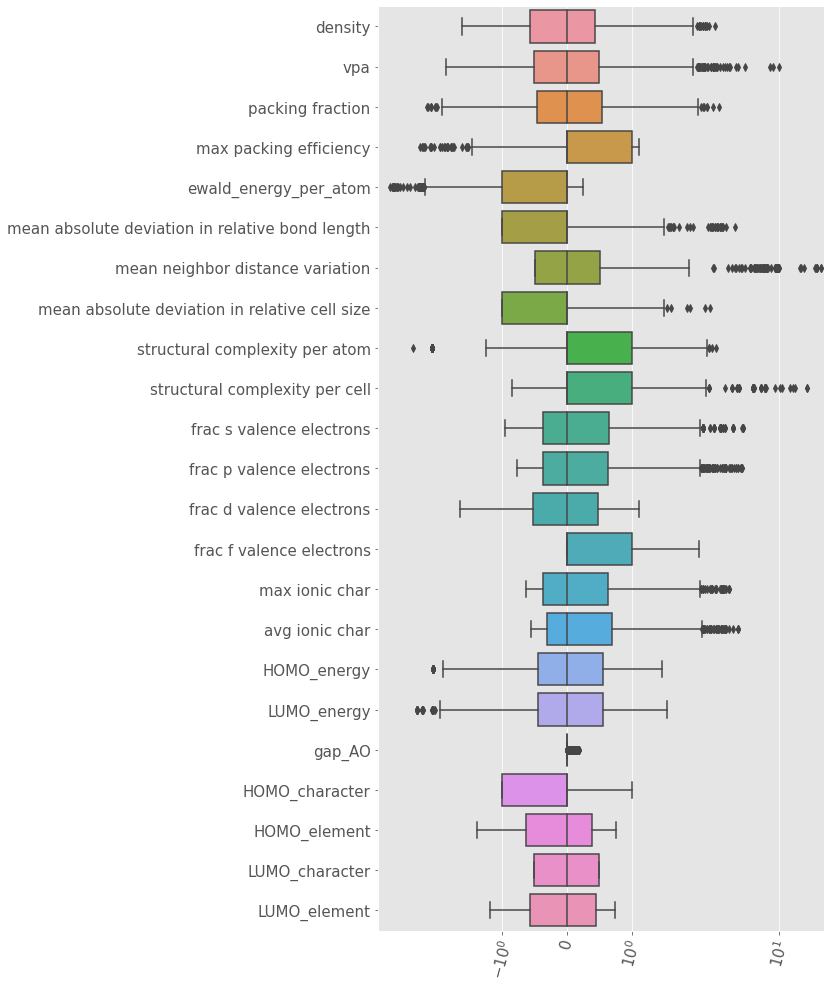

In [ ]:
fig, ax = plt.subplots(figsize =(8, 17))
ax = sns.boxplot(data=Xscaled_df, orient='h')
plt.tick_params(axis='both', labelsize = 15)
plt.xscale('symlog')
plt.yticks(rotation=0)
plt.xticks(rotation=75);

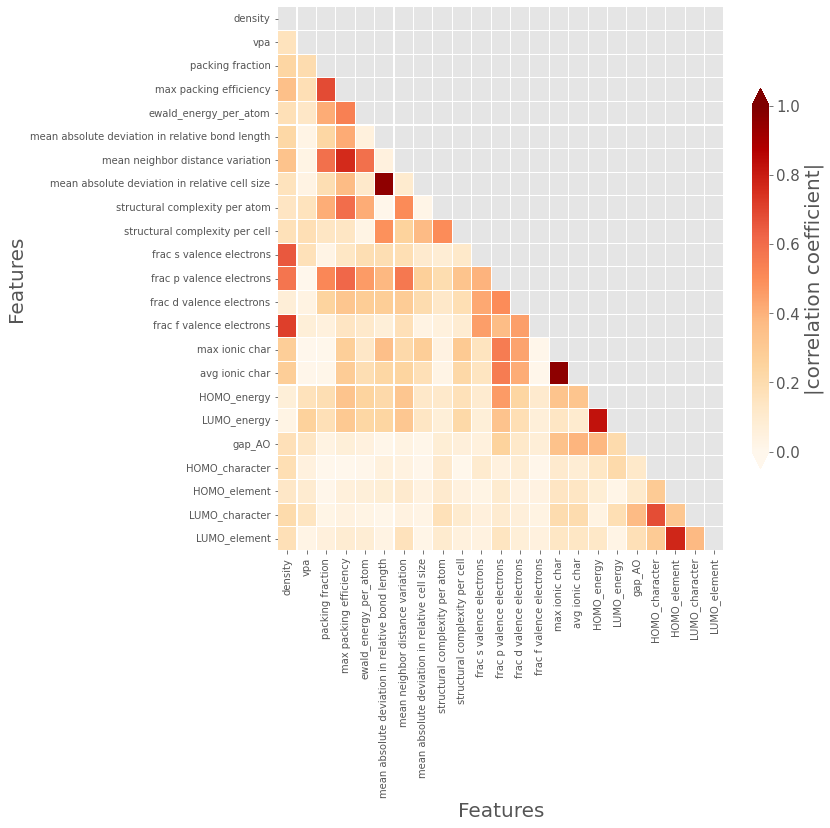

In [ ]:
matrix = np.triu(Xscaled_df.corr(method ='pearson').abs())

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(Xscaled_df.corr(method ='pearson').abs(), 
                 mask=matrix, 
                 cmap='OrRd', 
                 linecolor='white', 
                 linewidths=0.1, 
                 #annot=True, 
                 #annot_kws={'fontsize': 10, 
                       #'weight': 'bold'
                 #     }, 
                 #fmt='.2f', 
                 vmin=0, 
                 vmax=1, 
                 cbar_kws={'label': '|correlation coefficient|',  
                           'extend': 'both', 
                           'shrink':0.7}
                )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)

ax.set_ylabel('Features', fontsize = 20)
ax.set_xlabel('Features', fontsize = 20);
#f.savefig('Feature_Correlation.png', bbox_inches='tight', dpi=400);

In [ ]:
y = MLdf['crossings_+-1eV']
y.head(5)

9      7.0
20     4.0
26    11.0
30     4.0
31     2.0
Name: crossings_+-1eV, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled_df, y, 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=1
                                                   )

In [ ]:
df_y_train = pd.DataFrame(y_train)
df_y_train.head(5)

,crossings_+-1eV
3530,4.0
2040,19.0
76,2.0
2249,6.0
1171,4.0


In [ ]:
df_y_test = pd.DataFrame(y_test)
df_y_test.head(5)

,crossings_+-1eV
397,8.0
3174,29.0
57,14.0
1067,4.0
1154,32.0


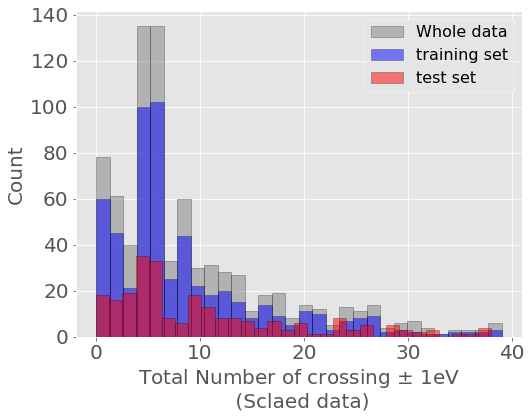

In [ ]:
fig, ax = plt.subplots(figsize =(8, 6))
plt.hist(MLdf['crossings_+-1eV'], 
         color = 'grey', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='Whole data')

plt.hist(y_train, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5,
         label='training set')

plt.hist(y_test, 
         color = 'red', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='test set')

plt.xlabel('Total Number of crossing $\pm$ 1eV\n (Sclaed data)', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.tick_params(axis='both', labelsize = 20)

https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

In [ ]:
estimator = xgb.XGBRegressor()

print(estimator.get_params().keys())

param_grid   = {"booster":           ['gbtree'], 
                'objective':         ['reg:squarederror'],
                "learning_rate":     (0.01, 3.0, "uniform"),  
                "max_depth":         (1, 50, "uniform"), 
                "max_delta_step":    (0, 10.0, "uniform"), 
                "subsample":         (0.01, 1.0, "uniform"), 
                "colsample_bytree":  (0.01, 1.0, "uniform"), 
                "colsample_bylevel": (0.01, 1.0, "uniform"), 
                "reg_lambda":        (1, 1000, "uniform"), 
                "reg_alpha":         (1e-9, 3.0, "uniform"), 
                "gamma":             (1e-9, 3.0, "uniform"), 
                "min_child_weight":  (0, 10, "uniform"),  
                "scale_pos_weight":  (1, 500, "uniform")
                }

ss = ShuffleSplit(n_splits=7, test_size=0.30, random_state=0)

gbm = BayesSearchCV(estimator=estimator, 
                    search_spaces=param_grid, 
                    cv=ss, 
                    n_iter=150, 
                    n_points=10, 
                    optimizer_kwargs={'base_estimator': 'GBRT', 
                                      'acq_optimizer': 'sampling',
                                      'initial_point_generator':'grid'
                                      }, 
                    #iid=False, 
                    verbose=0, 
                    n_jobs=-1, 
                    refit=True)

gbm.fit(X_train, y_train)
best = gbm.best_estimator_;

dict_keys(['base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'gamma', 'importance_type', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'n_estimators', 'n_jobs', 'nthread', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'seed', 'silent', 'subsample', 'verbosity'])


In [ ]:
# save the model to disk
#pkl.dump(best, open('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/Features_Matminer/ML_model.sav', 'wb'))

In [ ]:
estimator.importance_type

'gain'

In [ ]:
df0 = pd.DataFrame(gbm.cv_results_)
df0.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_colsample_bylevel,param_colsample_bytree,param_gamma,param_learning_rate,param_max_delta_step,param_max_depth,param_min_child_weight,param_objective,param_reg_alpha,param_reg_lambda,param_scale_pos_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.303173,0.076491,0.008067,0.003671,gbtree,0.7525,0.505,2.25,2.2525,5,38,5,reg:squarederror,0.75,500,250,0.7525,"{'booster': 'gbtree', 'colsample_bylevel': 0.7...",0.123606,0.175765,0.066450,0.018720,0.098002,0.285723,0.212650,0.140131,0.084467,82
1,0.431451,0.062385,0.007812,0.004306,gbtree,0.7525,0.7525,0.75,2.2525,2,26,2,reg:squarederror,1.5,750,250,0.7525,"{'booster': 'gbtree', 'colsample_bylevel': 0.7...",0.212416,0.185723,0.210053,-0.031098,0.263219,0.258380,0.206418,0.186445,0.092601,56
2,0.137917,0.018442,0.003701,0.000105,gbtree,0.2575,0.7525,1.5,2.2525,2,38,2,reg:squarederror,2.25,500,375,0.505,"{'booster': 'gbtree', 'colsample_bylevel': 0.2...",0.069883,-0.008675,0.087751,-0.011206,0.012734,0.115860,0.122746,0.055585,0.053197,102
3,0.115295,0.020782,0.005038,0.002987,gbtree,0.2575,0.505,0.75,1.505,2,38,8,reg:squarederror,2.25,251,375,0.7525,"{'booster': 'gbtree', 'colsample_bylevel': 0.2...",0.260410,0.156633,0.213585,0.049765,0.153503,0.295737,0.159934,0.184224,0.075096,57
4,0.179361,0.035010,0.003599,0.000085,gbtree,0.505,0.7525,0.75,1.505,5,38,8,reg:squarederror,1.5,251,250,0.505,"{'booster': 'gbtree', 'colsample_bylevel': 0.5...",0.035575,0.143661,0.248128,0.076626,0.019624,0.190319,0.089516,0.114779,0.077223,91


In [ ]:
gbm.best_params_

OrderedDict([('booster', 'gbtree'),
             ('colsample_bylevel', 0.9819574148927249),
             ('colsample_bytree', 0.3161167698556329),
             ('gamma', 0.625991302483136),
             ('learning_rate', 0.464574517209492),
             ('max_delta_step', 3),
             ('max_depth', 19),
             ('min_child_weight', 1),
             ('objective', 'reg:squarederror'),
             ('reg_alpha', 0.17886869785875725),
             ('reg_lambda', 300),
             ('scale_pos_weight', 399),
             ('subsample', 0.9632580260108363)])

In [ ]:
gbm.best_index_

121

In [ ]:
gbm.n_splits_

7

In [ ]:
gbm.multimetric_

False

In [ ]:
y_pred_train = best.predict(X_train)
y_pred_train

array([ 7.09907579e+00,  1.17055693e+01,  2.67805433e+00,  5.24239779e+00,
        3.42825031e+00,  1.05148773e+01,  1.10131731e+01,  5.35147429e+00,
        2.22728882e+01,  9.96663868e-01,  4.71674681e+00,  3.62343907e+00,
        1.33318644e+01,  1.33507624e+01,  1.39204597e+00,  2.68628430e+00,
        5.00116777e+00,  7.47186565e+00,  8.22303200e+00,  1.05684090e+01,
        4.43003178e+00,  1.66333187e+00,  1.81860752e+01,  8.09039974e+00,
        1.57752581e+01,  8.23457527e+00,  4.61656952e+00,  8.03356743e+00,
        2.51635933e+00,  1.05937643e+01,  1.91187725e+01,  1.46051197e+01,
        3.33010340e+00,  1.53225365e+01,  1.64041595e+01,  9.01010323e+00,
        8.36384106e+00,  9.89556313e+00,  5.32792854e+00,  1.49289818e+01,
        1.03125067e+01,  6.64217186e+00,  7.68853712e+00,  9.98150730e+00,
        7.05682325e+00,  7.29325581e+00,  2.38550320e+01,  4.81089067e+00,
        1.40977144e+01,  6.71653080e+00,  1.75848236e+01,  8.51599598e+00,
        1.90397205e+01,  

In [ ]:
y_pred_test = best.predict(X_test)

The rmse train: 3.3547456855862707
The rmse test: 7.9266766120631695
The MAE train: 2.1988878843053294
The MAE test: 5.484618573169398
The R^2 train: 0.8114550718314947
The R^2 test: 0.23701341944454324


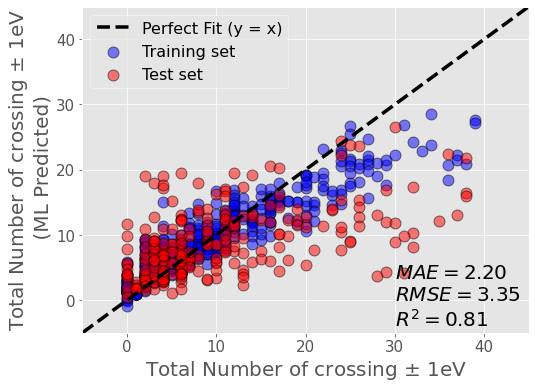

In [ ]:
x_ref_line = [-10, 100]
y_ref_line = [-10, 100]

x_ref_line_2 = np.linspace(-10, 10, 100)
y_ref_line_2 = np.linspace(-10, 10, 100)

# Print Result and Output figure
x1 = np.array(y_train)
y1 = np.array(y_pred_train)
x2 = np.array(y_test)
y2 = np.array(y_pred_test)

print('The rmse train:', mean_squared_error(y_train, y_pred_train, squared=False))
print('The rmse test:', mean_squared_error(y_test, y_pred_test, squared=False))
print('The MAE train:', mean_absolute_error(y_train, y_pred_train))
print('The MAE test:', mean_absolute_error(y_test, y_pred_test))
print('The R^2 train:', r2_score(y_train, y_pred_train))
print('The R^2 test:', r2_score(y_test, y_pred_test))

fig = plt.figure(figsize=(8, 6))
#plt.fill_between(x_ref_line_2, y_ref_line_2 - 1.0, y_ref_line_2 + 1.0, 
#                 color = '#546223', alpha=0.3, label='+/- 1eV')

z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x_ref_line, y_ref_line, 'k--', linewidth=3.5, label='Perfect Fit (y = x)')
#plt.plot(x1,p(x1),'--', color = 'dodgerblue', linewidth=3.5, label='Best Fit')

plt.scatter(x1, y1, s=120, c='blue', alpha=0.5, edgecolors='k', linewidths=1, label='Training set')
plt.scatter(x2, y2, s=120, c='red', alpha=0.5, edgecolors='k', linewidths=1, label='Test set')

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Total Number of crossing $\pm$ 1eV', fontsize = 20)
plt.ylabel('Total Number of crossing $\pm$ 1eV \n (ML Predicted)', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.legend(loc='upper left', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.grid(True)

plt.xlim(-5, 45)
plt.ylim(-5, 45);
text_kwargs = dict(fontsize=20, 
                   #ha='center', 
                   #va='center', 
                   color='k'
                  )

plt.text(30, -4, 
         (r'$MAE={:.2f}$' + '\n' + r'$RMSE={:.2f}$' + '\n' + r'$R^2={:.2f}$').format(mean_absolute_error(y_train, y_pred_train), 
                                                                                               mean_squared_error(y_train, y_pred_train, squared=False), 
                                                                                               r2_score(y_train, y_pred_train)
                                                                                              ), **text_kwargs
        );

In [ ]:
residuals_training = [y_train_i - y_pred_train_i for y_train_i, y_pred_train_i in zip(y_train, y_pred_train)]
#error_training

In [ ]:
residuals_testing = [y_test_i - y_pred_test_i for y_test_i, y_pred_test_i in zip(y_test, y_pred_test)]
#error_testing

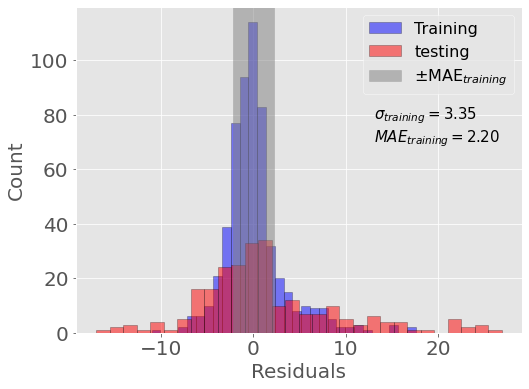

In [ ]:
fig, ax = plt.subplots(figsize =(8, 6))

plt.hist(residuals_training, 
         color = 'blue', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5,
         label='Training')

plt.hist(residuals_testing, 
         color = 'red', 
         edgecolor = 'black',
         bins = 30, 
         alpha=0.5, 
         label='testing')

ax.axvspan(-mean_absolute_error(y_train, y_pred_train), 
            mean_absolute_error(y_train, y_pred_train), 
            alpha=0.5, 
            color='grey', 
            label='$\pm$MAE$_{training}$')

plt.legend(loc='upper right', fontsize = 16, ncol = 1).get_frame().set_edgecolor('w')
plt.xlabel('Residuals', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

text_kwargs = dict(fontsize=15, 
                   #ha='center', 
                   #va='center', 
                   #color='gray'
                  )

ax.text(13, 70, 
        (r'$\sigma_{1}={0:.2f}$' + '\n' + r'$MAE_{1}={2:.2f}$' ).format(np.std(residuals_training), 
                                         '{training}', 
                                         mean_absolute_error(y_train, y_pred_train)
                                        ), 
        **text_kwargs)



plt.tick_params(axis='both', labelsize = 20);

# Feature Importances

In [ ]:
imp = pd.DataFrame(best.feature_importances_, 
                   columns = ['Importance'], 
                   index = Xscaled_df.columns)

imp = imp.sort_values(['Importance'], ascending = False)
imp

,Importance
LUMO_energy,0.135499
LUMO_character,0.101324
structural complexity per cell,0.069511
structural complexity per atom,0.067372
mean absolute deviation in relative cell size,0.064742
ewald_energy_per_atom,0.058136
frac p valence electrons,0.048902
vpa,0.040723
max packing efficiency,0.039994
frac f valence electrons,0.039171


In [ ]:
imp['Features'] = imp.index
imp

,Importance,Features
LUMO_energy,0.135499,LUMO_energy
LUMO_character,0.101324,LUMO_character
structural complexity per cell,0.069511,structural complexity per cell
structural complexity per atom,0.067372,structural complexity per atom
mean absolute deviation in relative cell size,0.064742,mean absolute deviation in relative cell size
ewald_energy_per_atom,0.058136,ewald_energy_per_atom
frac p valence electrons,0.048902,frac p valence electrons
vpa,0.040723,vpa
max packing efficiency,0.039994,max packing efficiency
frac f valence electrons,0.039171,frac f valence electrons


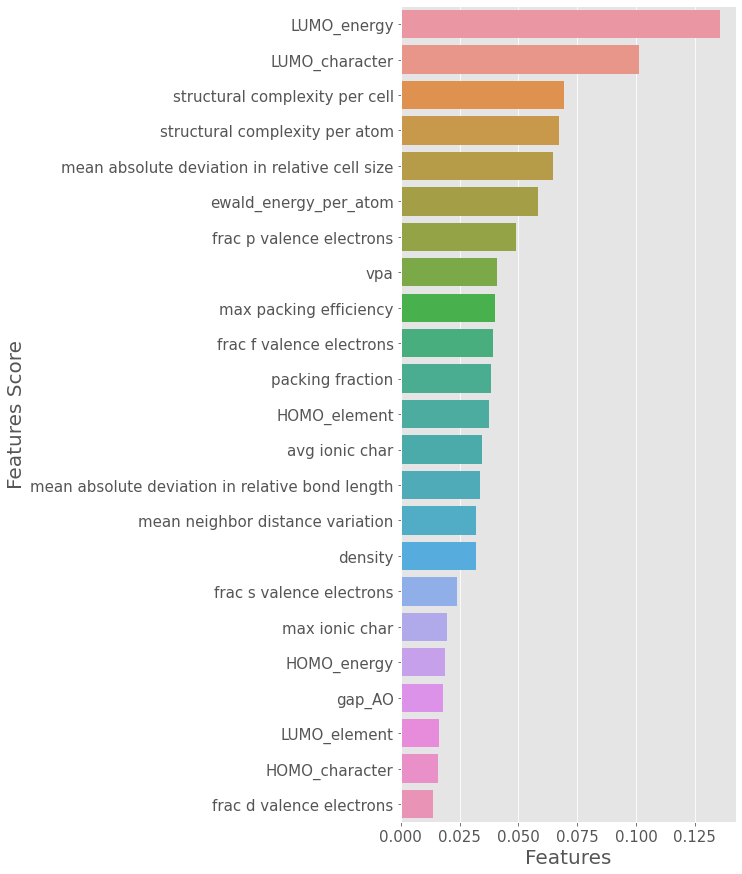

In [ ]:
fig = plt.figure(figsize=(6, 15))

ax = sns.barplot(y="Features", x="Importance", data=imp)
#ax.axhline(0.125, color='b', lw=3)

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Features Score', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)
plt.tick_params(axis='y', rotation = 0)
#plt.ylim(0, 0.2);